# Classification Metrics

**import libraries**

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


### The Confusion Matrix

looking at digits dataset

In [4]:
# Load the digits data

# The deafult with 10 classes (digits 0-9)
digits = datasets.load_digits(n_class=10)

# Create the feature matrix
X = digits.data

# Create the target array
y = digits.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate and train a decision tree classifier
dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)

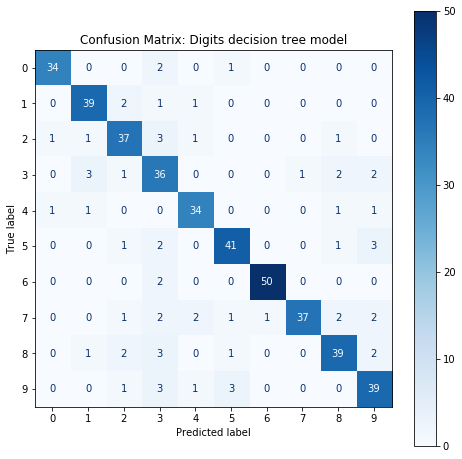

In [8]:
# Plot the decision matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))

plot_confusion_matrix(dt_classifier, X_test, y_test,
                                 display_labels=digits.target_names,
                                 cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix: Digits decision tree model')

plt.plot();

### Precision and Recall

Precision is the portion of positive classifications that were actually correct. It can be calculated by the following equation:

 $\text{Precision} = \frac{TP}{TP + FP}$

whereTPis the number of true positives andFPis the number of false positives. A false positive is where an observation is predicted to belong to a class but isn’t actually of that class.

The other metric that is useful in evaluation classification models is the recall or portion of actual positives that were identified correctly. This value is calculated by:

 $\text{Recall} = \frac{TP}{TP + FN}$ 

where $TP$ is the number of true positives and $FN$ is the number of false negatives. A false negative is where in observation is not predicted to belong to a certain class but actually is of that class.

There is a balance between precision and recall: often by improving one value, the other value decreases. In other words, if we reduce the number of false positives (by improving our model), the precision will increase. But fewer false positives results in more false negatives, which decreases the recall value.

A value that takes into consider both precision and recall is called the F1 score, or sometimes just the F-score. It is calculated by:

${F_1} = \frac{\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}$

In [17]:
# Load the digits data

# Use the first four digits (0-3)
digits = datasets.load_digits(n_class=4)

# Create the feature, target
X = digits.data
y = digits.target

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate and train a decision tree classifier
dt_classifier = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

Text(0.5, 1.0, 'Confusion Matrix: Digits decision tree model')

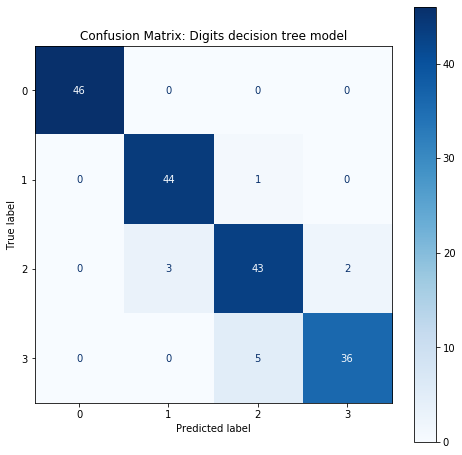

In [18]:
# Plot the decision matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8,8))

plot_confusion_matrix(dt_classifier, X_test, y_test, cmap=plt.cm.Blues, ax=ax)

ax.set_title('Confusion Matrix: Digits decision tree model')

In [19]:
y_pred = dt_classifier.predict(X_test)
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.94      0.98      0.96        45
           2       0.88      0.90      0.89        48
           3       0.95      0.88      0.91        41

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



### Probability thresholds

There might be some situations where using a different probability threshold is important. For example, in a medical study using very expensive medication with very negative side effects, it might be necessary to set the probability threshold much higher than 0.5 to classify a patient as needing the medication. In this case, the medication should only be used if the patient has a high probability of belonging to a class that needs the treatment.

In [21]:
# Create the data (feature, target)
X, y = make_classification(n_samples=10000, n_features=5,
                          n_classes=2, n_informative=3,
                          random_state=42)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and fit the model
logreg_classifier = LogisticRegression().fit(X_train, y_train)

In [22]:
# The value of the 10th observation
print('The 10th observation: ', X_test[10:11])
# Print out the probability for the 10th observation
print('Predicted probability for the 10th observation: ',
      logreg_classifier.predict_proba(X_test)[10:11])
# Print the two classes
print('The two classes: ')
logreg_classifier.classes_

The 10th observation:  [[-0.73552378  1.05914888 -0.60278934 -0.32282208  0.55717004]]
Predicted probability for the 10th observation:  [[0.73592057 0.26407943]]
The two classes: 


array([0, 1])

This observation has a 74% chance of belonging to the first class and a 26% chance of belonging in the second class. Is it actually in the first class (0)? 

In [23]:
# Check the class of the 10th observation
logreg_classifier.predict(X_test[10:11])

array([0])

### ROC AUC (receiver operating characteristic)

 go back to the idea of calculating true positives and true negatives and look at a different measurement, the true positive rate (TPR) and the false positive rate (FPR).

 $\text{TPR} = \frac{\text{True Positives}}{\text{True Positives}+\text{False Negatives}}$

 $\text{FPR} = \frac{\text{False Positives}}{\text{False Positives}+\text{True Negatives}}$

Both of the above measurements are the total true or false positives normalized by the total for each.

When we create a ROC curve, we are plotting the TPR against the FPR for a range of threshold values.

**create data fit model calculate prob thresholds**

In [25]:
# Create the data (feature, target)
X, y = make_classification(n_samples=10000, n_features=5,
                          n_classes=2, n_informative=3,
                          random_state=42)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create and fit the model
logreg_classifier = LogisticRegression().fit(X_train, y_train)

# Create predicted probabilities
y_pred_prob = logreg_classifier.predict_proba(X_test)[:,1]

**create and view data for ROC curve**

In [26]:
# Create the data for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# See the results in a table
roccurve_df = pd.DataFrame({
    'False Positive Rate': fpr, 
    'True Positive Rate': tpr, 
    'Threshold': thresholds
})

roccurve_df.head()

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,1.999969
1,0.000000,0.000786,0.999969
2,0.000000,0.291438,0.983222
3,0.000815,0.291438,0.983049
4,0.000815,0.360566,0.970583


**Graph the ROC curve**

Text(0, 0.5, 'True Positive Rate')

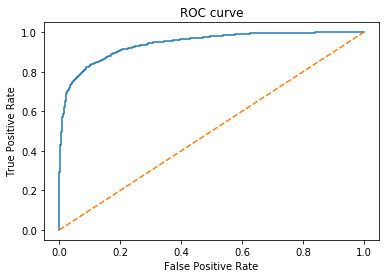

In [27]:
# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.plot([0,1], ls='--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

**Calculate the AUC or score...**

- highest value is one

In [29]:
# Calculate the area under the curve
roc_auc_score(y_test, y_pred_prob)

0.9419681927513379